In [1]:
import pandas as pd
# from google.colab import drive
# drive.mount('/content/drive')
# fashion_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/TIL2020/fashion/TIL_NLP_train_dataset.csv')
fashion_train = pd.read_csv('datasets/TIL_NLP_train_dataset.csv')
fashion_train.head()

,id,word_representation,outwear,top,trousers,women dresses,women skirts
0,0,w7718 w173355 w138132 w232277 w90685 w314686 w...,1,0,1,0,0
1,1,w195317 w127737 w171593 w22890 w342007 w217871...,1,0,1,0,0
2,2,w247655 w270233 w261113 w337250 w366000 w37873...,0,1,1,0,0
3,3,w279289 w395855 w61795 w286461 w308610 w27013 ...,1,0,1,0,0
4,4,w254516 w135431 w115724 w331534 w256214 w71240...,1,0,1,0,0


In [2]:
# take a look at data types in fashion_train
fashion_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7380 entries, 0 to 7379
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   7380 non-null   int64 
 1   word_representation  7380 non-null   object
 2   outwear              7380 non-null   int64 
 3   top                  7380 non-null   int64 
 4   trousers             7380 non-null   int64 
 5   women dresses        7380 non-null   int64 
 6   women skirts         7380 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 403.7+ KB


In [3]:
fashion_train

,id,word_representation,outwear,top,trousers,women dresses,women skirts
0,0,w7718 w173355 w138132 w232277 w90685 w314686 w...,1,0,1,0,0
1,1,w195317 w127737 w171593 w22890 w342007 w217871...,1,0,1,0,0
2,2,w247655 w270233 w261113 w337250 w366000 w37873...,0,1,1,0,0
3,3,w279289 w395855 w61795 w286461 w308610 w27013 ...,1,0,1,0,0
4,4,w254516 w135431 w115724 w331534 w256214 w71240...,1,0,1,0,0
...,...,...,...,...,...,...,...
7375,7375,w373517 w350483 w37419 w162965 w286461 w35248 ...,0,1,1,0,0
7376,7376,w261297 w162756 w283853 w500021 w256905 w22079...,1,1,0,0,0
7377,7377,w58536 w182664 w317736 w261297 w91800 w314686 ...,1,0,1,0,0
7378,7378,w194870 w122953 w256905 w66217 w207614 w34893 ...,1,1,0,0,0


In [4]:
# find the longest sentence

def max_len(x):
    a=x.split()
    return len(a)

print('maximum length of sentence = ', max( fashion_train['word_representation'].apply(max_len)))

maximum length of sentence =  47


In [5]:
MAX_LEN = 47
DIM = 100

In [6]:
# find the number of unique words

from keras.preprocessing.text import Tokenizer
vect=Tokenizer()
vect.fit_on_texts(fashion_train['word_representation'])
word_index = vect.word_index
print('Number of unique words= ', len(vect.word_index) + 1)

Using TensorFlow backend.


Number of unique words=  4250


In [7]:
fashion_test = pd.read_csv('datasets/TIL_NLP_test_dataset.csv')
fashion_test

,id,word_representation
0,0,w373517 w383437 w374393 w87179 w289496 w327385...
1,1,w237465 w167111 w279437 w194870 w351537 w17560...
2,2,w151648 w93366 w121255 w193800 w71240 w48576 w...
3,3,w182664 w317736 w33852 w111248 w45374 w209361 ...
4,4,w206647 w236725 w99560 w338476 w75409 w36882 w...
...,...,...
2455,2455,w104709 w384021 w277040 w365489 w500187 w25013...
2456,2456,w195317 w102200 w381413 w34893 w183695 w69002 ...
2457,2457,w373517 w347736 w159941 w34893 w39218 w223408 ...
2458,2458,w207614 w194000 w390708 w322224 w70969 w311583...


In [8]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.callbacks import ModelCheckpoint ,EarlyStopping
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

In [9]:
# get output in another dataframe

train_labels_df = fashion_train[["outwear", "top", "trousers", "women dresses", "women skirts"]]
train_labels_df.head()

,outwear,top,trousers,women dresses,women skirts
0,1,0,1,0,0
1,1,0,1,0,0
2,0,1,1,0,0
3,1,0,1,0,0
4,1,0,1,0,0


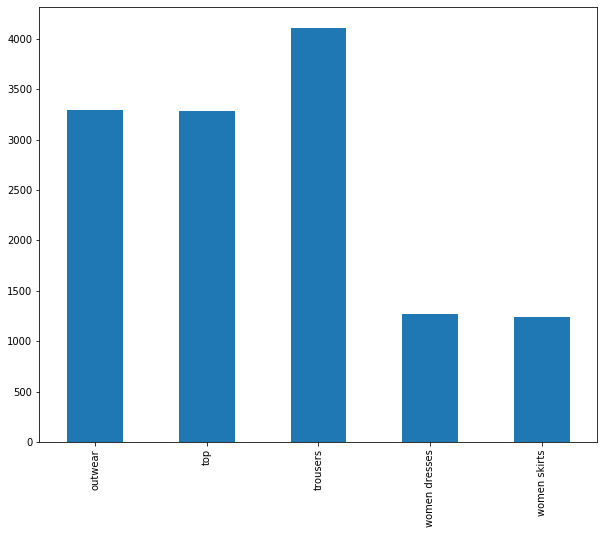

In [10]:
# take a look at the distribution of output
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

train_labels_df.sum(axis=0).plot.bar()

In [11]:
# get X and y
X = []
sentences = list(fashion_train["word_representation"])
for sen in sentences:
    X.append(sen)

#Here we do not need to perform any one-hot encoding because our output labels are already in the form of one-hot encoded vectors.
y = train_labels_df.values

In [12]:
y_train = y

In [13]:
X_train = []
for index in fashion_train.index:
  X_train.append(fashion_train['word_representation'][index])
  
X_test = []
for index in fashion_test.index:
  X_test.append(fashion_test['word_representation'][index])

In [14]:
#word embeddings

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

MAX_LEN = 47
DIM = 100
MAX_WORDS= 10000
VALIDATION_SPLIT = 0.2

X_train = pad_sequences(X_train, padding='post', maxlen=MAX_LEN)
X_test = pad_sequences(X_test, padding='post', maxlen=MAX_LEN)


In [15]:
#import the pretrained word embedding file

import pickle
with open('datasets/word_embeddings.pkl', 'rb') as f:
    word_embeddings = pickle.load(f)

In [16]:
# processing word_embeddings.pkl as embedding matrix

print('Preparing embedding matrix.')



# prepare embedding matrix
num_words = min(MAX_WORDS, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, DIM))
for word, i in word_index.items():
    if i >= MAX_WORDS:
        continue
    embedding_vector = word_embeddings.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

embedding_matrix.shape

Preparing embedding matrix.


(4250, 100)

In [17]:
# Our model will have one input layer, one embedding layer, 2 LSTM layer with 128 neurons and one output layer with 5 neurons since we have 5 labels in the output

deep_inputs = Input(shape=(MAX_LEN,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128,return_sequences=True, dropout =0.4, recurrent_dropout = 0.4)(embedding_layer) #,return_sequences=True
LSTM_Layer_2 = LSTM(64)(LSTM_Layer_1) #,dropout = 0.5, recurrent_dropout=0.5
dense_layer_1 = Dense(5, activation='sigmoid')(LSTM_Layer_2)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [18]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 47)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 47, 100)           425000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 47, 128)           117248    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 591,981
Trainable params: 166,981
Non-trainable params: 425,000
_________________________________________________________________
None


In [110]:
es_callback = EarlyStopping(monitor='val_loss', patience=40) #early stopping if the val loss doesnt improve after awhile

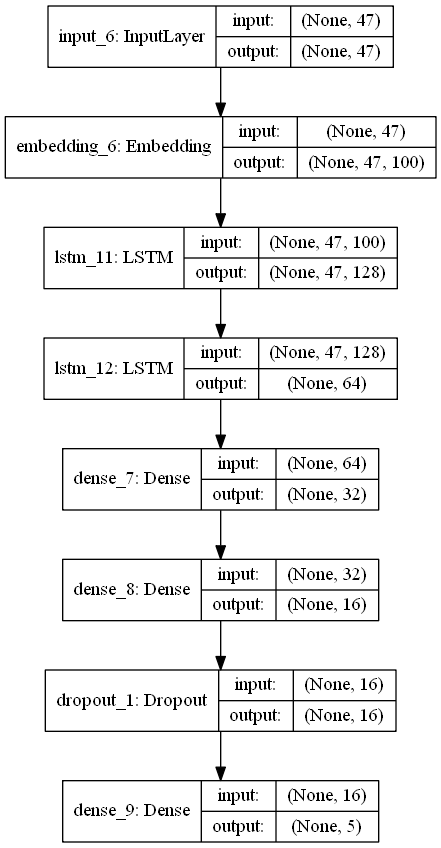

In [111]:
#visualisation of the above summary

from keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_split=0.2,callbacks=[es_callback])

Train on 5904 samples, validate on 1476 samples
Epoch 1/200
5904/5904 [==============================] - 21s 4ms/step - loss: 0.6515 - acc: 0.6106 - val_loss: 0.6173 - val_acc: 0.6547
Epoch 2/200
5904/5904 [==============================] - 19s 3ms/step - loss: 0.6194 - acc: 0.6448 - val_loss: 0.5747 - val_acc: 0.6705
Epoch 3/200
5904/5904 [==============================] - 15s 3ms/step - loss: 0.5948 - acc: 0.6600 - val_loss: 0.5476 - val_acc: 0.6756
Epoch 4/200
5904/5904 [==============================] - 21s 3ms/step - loss: 0.5740 - acc: 0.6749 - val_loss: 0.5278 - val_acc: 0.6766
Epoch 5/200
5904/5904 [==============================] - 17s 3ms/step - loss: 0.5522 - acc: 0.6840 - val_loss: 0.5012 - val_acc: 0.7007
Epoch 6/200
5904/5904 [==============================] - 15s 3ms/step - loss: 0.5357 - acc: 0.6883 - val_loss: 0.4923 - val_acc: 0.6897
Epoch 7/200
1920/5904 [========>.....................] - ETA: 8s - loss: 0.5244 - acc: 0.6981

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

# Processing Test Data

In [ ]:
X_test

In [ ]:
# predict crisp classes for test set
yhat = model.predict(X_test, verbose=0)
preds_labels = [[1 if x > 0.5 else 0 for idx,x in enumerate(i) ] for i in yhat]
preds_labels

In [ ]:
id_list = []
outwear = []
top = []
trousers = []
women_dresses =[]
women_skirts = []
for i in range(len(preds_labels)):
    id_list.append(i)
    outwear.append(preds_labels[i][0])
    top.append(preds_labels[i][1])
    trousers.append(preds_labels[i][2])
    women_dresses.append(preds_labels[i][3])
    women_skirts.append(preds_labels[i][4])


In [ ]:
output = pd.DataFrame({'id': id_list,
                       'outwear': outwear,
                       'top' : top,
                       'trousers': trousers,
                       'women dresses':women_dresses,
                       'women skirts': women_skirts})
output.to_csv('submission.csv', index=False)